## Scheduling of hospital's inventory during the COVID-19 crisis
**Author: Miguel Zabaleta**

One of the most problematic issues that hospitals needed to face during the COVID-19 crisis was the overwhelming amount of infected people that would attend the hospital in need of treatment.  
With the unexpected demand needed to be covered also came a plan that, on behalf of these expected new patients, could account for the number of resources that had to be ordered.  
Additionally, as the demand grew across all hospitals, numerous companies started developing solutions to provide for this demand.

It was also crucially important for hospitals to plan ahead by requesting resources excessively so that as the pandemic would grow on numbers, there would be enough medical means.  

This brings a crucial problem to the table that can be modeled, studied and solved using a linear optimization framework.  
Given the different items that need to be allocated on different time-periods and considering the offers that providers have according to these items and time-periods:

- How many items from each vendor on each time-frame should be ordered, so that we minimize the overall cost?

This is the question we ultimately want to give a solution to. 

### a) Formulation

The variables (i.e. the medical items) we are going to consider are the following (icu = intensive care unit):  
- Beds: normal, semi-icu, icu  
- Respirators: icu, not-icu  
- Epidemic expendables packs (masks, hospital gowns, caps, ... 3 per patient)
- Full meal packs  
- Laundry packs  
- Fungible packs (serums, syringes, ...)

For each of these 9 items, we will consider there are 4 different suppliers to get the order from.  

These 36 resources will constitute for the first dimension in our set of variables (denoted by i-th index).  
Additionally, as we introduced earlier, the second dimension will decide the frequency in which the order should be put in place.  
Specifically, we will adjust for weekly, monthly, and on a 3-month basis.

This will result in 36 * 3 = **108 total variables**

Our objective function will be to minimize the total cost of these items, taking into account the following considerations:

- Prices that different providers offer for each item on each "temporal batch"  
- Expected demand for each item/set of items depending on the number of expected new patients for each time-period  
- Weekly, monthly, trimestral and total budget constraints

### Sets

 $I$ = {${1,2,...,36}$} = set of items  
 $J$ = {${1,2,3}$} = set of time periods  
 $K$ = type of patient = {regular, intermediate, critical}
 
 Variables are ordered according to the initial bullet points, considering first each provider, then the type of patient and item.  
 That is, variables 1-4 will make up for regular beds (for each provider), 5-8 for semi-icu beds, 13-16 for icu respirators, ..., and so on.  

### Parameters

 $c_{ij}$ = cost per unit of item $i$, for a period $j$, $\forall i \in I, \forall j \in J$   
 $exp_{kj}$ = expected new patients of type $k$ in period $j$, $\forall k \in K$, $\forall j \in J$  
 $exp_j =  \sum_{k \in K} exp_{kj}$ overall expected new patients in period $j$, $\forall j \in J$ 


 $Bud_j$ = available budget in period $j$, $\forall j \in J$  
 $Bud_{total}$ = total budget available

 
### Variables
 $x_{ij}$ = number of units of item $i$ to order on time period $j$ (implemented as real variables in order to calculate sensitivities)

### Objective

Minimize the total cost of the order  
\begin{align*}
\underset{x_{ij}}{\min} & \quad \sum_{i=1}^{n}\sum_{j=1}^{m}c_{ij}x_{ij}\\
\end{align*}

### Constraints

Provide enough resources for the expected new patients for each period $j \in J$.   
In order: beds (3 types), respirators (2 types), epidemic expendables packs (3 per patient, per day), full meal packs (per day), laundry packs (per day), fungible packs (per day).  
In total, there are 9*3 + 3+1 = **31 constraints**

\begin{align*} 
\\
  &\sum_{i=1}^{4} x_{ij} \geq exp_{1j} \quad \forall j  \in J\\   
  &\sum_{i=5}^{8} x_{ij} \geq exp_{2j} \quad \forall j  \in J\\   
  &\sum_{i=9}^{12} x_{ij} \geq exp_{3j} \quad \forall j  \in J\\   
  &\sum_{i=13}^{16} x_{ij} \geq exp_{3j} \quad \forall j  \in J\\   
  &\sum_{i=17}^{20} x_{ij} \geq exp_{2j} \quad \forall j  \in J\\   
  &\sum_{i=21}^{24} x_{ij} \geq (30*3)exp_{j} \quad \forall j  \in J\\   
  &\sum_{i=25}^{28} x_{ij} \geq 30exp_{j} \quad \forall j \in J\\  
  &\sum_{i=29}^{32} x_{ij} \geq 30exp_{j} \quad \forall j \in J\\  
  &\sum_{i=33}^{36} x_{ij} \geq 30exp_{j} \quad \forall j \in J\\  
\end{align*}

Budget constraints:  
\begin{align*} 
\\
  &\sum_{i \in I} c_{ij} x_{ij} \leq Bud_{j} \quad \forall j  \in J\\  
  &\sum_{j \in J}\sum_{i \in I} c_{ij} x_{ij} \leq Bud_{total} \quad\\  
\end{align*}

Order lower bound:  
\begin{align*} 
\\
  &x_{ij} \geq 0 \quad \forall i \in I, \forall j \in J\\  
\end{align*}


### b) Implementation

### Data generation

In order to generate the data in the most systematic way, I decided to set an initial price for each item, and vary its price across time by a factor of 1, 1/2, 1/3 (for each time period).  
Also, for setting the prices for the different suppliers, a cheapness factor was created that would be dividing each price (the larger, the cheaper).  

This makes it very simple to get data for more suppliers, or implement desired specifics into which provider is the best option for a particular item.  
In this case, we will not do any additional specifications on the prices.

In addition, we have included a section as **appendix** in which the inputs by which the data is constructed from are **interactively** implemented in the model.  
This makes it more realistic to what could be done in practice, as the **usability** of these models can be a key advantage.

In [1]:
cf = [1,1.4,1.1,1.3] # cheapness factor per supplier
supp1 = []
supp2 = []
supp3 = []
supp4 = []    
for j in range(0,3):
    supp1.append([])
    supp2.append([])
    supp3.append([])
    supp4.append([])
    
    supp1[j].append([500/(cf[0]*(j+1)),800/(cf[0]*(j+1)),1300/(cf[0]*(j+1)), # bed prices
                   50000/(cf[0]*(j+1)),20000/(cf[0]*(j+1)), # respirators prices
                   30/(cf[0]*(j+1)), # epidemic expendables prices
                   50/(cf[0]*(j+1)), # full meal prices 
                   100/(cf[0]*(j+1)), # laundry prices
                   25/(cf[0]*(j+1))]) # fungibles prices
    supp2[j].append([500/(cf[1]*(j+1)),800/(cf[1]*(j+1)),1300/(cf[1]*(j+1)),
                   50000/(cf[1]*(j+1)),20000/(cf[1]*(j+1)),
                   30/(cf[1]*(j+1)),
                   50/(cf[1]*(j+1)),
                   100/(cf[1]*(j+1)),
                   25/(cf[1]*(j+1))])
    supp3[j].append([500/(cf[2]*(j+1)),800/(cf[2]*(j+1)),1300/(cf[2]*(j+1)),
                   50000/(cf[2]*(j+1)),20000/(cf[2]*(j+1)),
                   30/(cf[2]*(j+1)),
                   50/(cf[2]*(j+1)),
                   100/(cf[2]*(j+1)),
                   25/(cf[2]*(j+1))])
    supp4[j].append([500/(cf[3]*(j+1)),800/(cf[3]*(j+1)),1300/(cf[3]*(j+1)),
                   50000/(cf[3]*(j+1)),20000/(cf[3]*(j+1)),
                   30/(cf[3]*(j+1)),
                   50/(cf[3]*(j+1)),
                   100/(cf[3]*(j+1)),
                   25/(cf[3]*(j+1))])

Now, we can easily create the dictionary with the desired key-value pairs.

In [2]:
c = {}
supps = [supp1,supp2,supp3,supp4]
for j in range(3):
    for i in range(9):
        for k in range(4):
            c[((4*i)+(k+1),j+1)] = supps[k][j][0][i]

In [3]:
print(c)

{(1, 1): 500.0, (2, 1): 357.14285714285717, (3, 1): 454.5454545454545, (4, 1): 384.6153846153846, (5, 1): 800.0, (6, 1): 571.4285714285714, (7, 1): 727.2727272727273, (8, 1): 615.3846153846154, (9, 1): 1300.0, (10, 1): 928.5714285714287, (11, 1): 1181.8181818181818, (12, 1): 1000.0, (13, 1): 50000.0, (14, 1): 35714.28571428572, (15, 1): 45454.54545454545, (16, 1): 38461.53846153846, (17, 1): 20000.0, (18, 1): 14285.714285714286, (19, 1): 18181.81818181818, (20, 1): 15384.615384615385, (21, 1): 30.0, (22, 1): 21.42857142857143, (23, 1): 27.27272727272727, (24, 1): 23.076923076923077, (25, 1): 50.0, (26, 1): 35.714285714285715, (27, 1): 45.45454545454545, (28, 1): 38.46153846153846, (29, 1): 100.0, (30, 1): 71.42857142857143, (31, 1): 90.9090909090909, (32, 1): 76.92307692307692, (33, 1): 25.0, (34, 1): 17.857142857142858, (35, 1): 22.727272727272727, (36, 1): 19.23076923076923, (1, 2): 250.0, (2, 2): 178.57142857142858, (3, 2): 227.27272727272725, (4, 2): 192.3076923076923, (5, 2): 400.

Next, we need to generate the expected new infected people on a weekly, monthly and trimestral basis.

We have considered that 100 new patients start coming every week, and after 1 month this number increases by 50% and crucially, stays the same from every month forward.  
However, this 50% increase itself increases by 25% after 3 months.

Numerically, this means that for the first 4 weeks, 100 patients will come every week;  
then, 150 new patients will come for the next 8 weeks;
and from then onwards, (0.5 * 0.25) = 0.125% increase, which means that (50+12.5)*100 = 162.5 new patients will come every week.

This sort of implementation is needed so that it respects the design in our model.
That is, we need to fix the number of items we need to get for each time period.

For instance, we cannot say we need X units of item A to order weekly for weeks 1-4, then X' units for weeks 8-13.  
In order to do this, we will account for the additional patients we are expecting with respect to the accumulated sum over time, and make that order only once.

We start with 100 patients for the first 4 weeks.  
Then, we will need 150 units for the next 8 weeks.  
As we will already be ordering 100 of them, the remaining ones (the additional ones) that we will need are 50 * 8 = 400 units.  
Which is 8 * initial_number_patients * 0.5 (monthly_growth).  
This order would be put on weeks 5,9,13, ... and so on.

Finally, for the next 3 months (3 * 4 weeks) we will need 162.5 new patients, so the trimestral order will have to be of 12 * initial_patients * montly_growth * 3monthly_growth (which is 12 * 12.5 = 150 units).   
This order would be put on weeks 13,25,37, ...

In [4]:
import math

n = 36
m = 3
initial = 100
monthly_gr = 0.5
monthly_gr3 = 0.25

exp = {1:initial,
       2:8*initial*monthly_gr,
       3:4*3*initial*monthly_gr*monthly_gr3}
bud = {1:2*10**6,2:5*10**6,3:10**6}
total_bud = 10*10**6

# 60% regular patients, 30% intermediate, 10% critical
exp1 = {x:math.ceil(y*0.6) for x, y in exp.items()} # round up number of expected patients
exp2 = {x:math.ceil(y*0.3) for x, y in exp.items()}
exp3 = {x:math.ceil(y*0.1) for x, y in exp.items()}

In [5]:
import pyomo.environ as pyo
opt = pyo.SolverFactory('glpk')

model = pyo.ConcreteModel(name="Hospital scheduling")


model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)

model.I = pyo.RangeSet(1,model.n) 
model.J = pyo.RangeSet(1,model.m)

model.c = pyo.Param(model.I, model.J,initialize=c) # item cost
model.exp = pyo.Param(model.J,initialize=exp) # demand for expected overall patients on time-period j
model.exp1 = pyo.Param(model.J,initialize=exp1) # demand for expected regular patients on time-period j
model.exp2 = pyo.Param(model.J,initialize=exp2) # demand for expected intermediate patients on time-period j
model.exp3 = pyo.Param(model.J,initialize=exp3) # demand for expected critical patients on time-period j
model.bud = pyo.Param(model.J,initialize=bud) # budget for time-period j

model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeReals)

def obj_expression(model): 
    return pyo.summation(model.c, model.x)  

model.OBJ = pyo.Objective(rule=obj_expression)

def beds1_constraint(model, j): 
     return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
def beds2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
def beds3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]
    
def respirators3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
def respirators2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]
    
def epidemic_exp_constraint(model, j): 
     return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
def meals_constraint(model, j): 
     return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
def laundry_constraint(model, j): 
     return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
def fungibles_constraint(model, j): 
     return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

def budget_constraint(model, j): 
     return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
def total_budget_constraint(model): 
     return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud
    
model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)


results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpb6rv6moj.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpvufmx1tx.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpc07igo4s.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpc07igo4s.pyomo.lp'...
32 rows, 109 columns, 325 non-zeros
645 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpvufmx1tx.glpk.glp'...
609 lines were written
GLPK Simplex Optimizer 5.0
32 rows, 109 columns, 325 non-zeros
Preprocessing...
31 rows, 108 columns, 324 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+04  ratio =  5.000e+04
GM: min|aij| =  8.710e-01  max|aij| =  1.148e+00  ratio =  1.318e+00
EQ: min|aij| =  7.587e-01  max|aij| =  1.000e+00  ratio =  1.318e+00
Constructing initial basis...
Size of triangular part is 31
      0: obj =   0.000000000e+00 inf =   9.653e+03 (27)
     27: obj =   4.913241758e+06 inf

In [6]:
model.display()

Model Hospital scheduling

  Variables:
    x : Size=108, Index=x_index
        Key     : Lower : Value   : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (1, 2) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (1, 3) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (2, 1) :     0 :    60.0 :  None : False : False : NonNegativeReals
         (2, 2) :     0 :   240.0 :  None : False : False : NonNegativeReals
         (2, 3) :     0 :    90.0 :  None : False : False : NonNegativeReals
         (3, 1) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (3, 2) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (3, 3) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (4, 1) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (4, 2) :     0 :     0.0 :  None : False : False : NonNegativeReals
         (4, 3

If we take a look at the tuples that we ordered from, these are:  
- (2,1), (2,2), (2,3) - these correspond to regular beds from supplier 2 (cheapest one) on time-periods j=1,2,3
- (6,1), (6,2), (6,3) - these correspond to semi-icu beds from supplier 2 on time-periods j=1,2,3

As we can see, the next tuples will be (10,1), ..., and so on.  
This means that we always buy from the supplier 2, as it's the cheapest option across all items.

The total money spent is 4.9 millions of euros.

### c) Sensitivities

In [7]:
model = pyo.ConcreteModel(name="Hospital scheduling")

model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)

model.I = pyo.RangeSet(1,model.n) 
model.J = pyo.RangeSet(1,model.m)

model.c = pyo.Param(model.I, model.J,initialize=c)
model.exp = pyo.Param(model.J,initialize=exp)
model.exp1 = pyo.Param(model.J,initialize=exp1)
model.exp2 = pyo.Param(model.J,initialize=exp2)
model.exp3 = pyo.Param(model.J,initialize=exp3)
model.bud = pyo.Param(model.J,initialize=bud)

model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeReals)

def obj_expression(model): 
    return pyo.summation(model.c, model.x)  

model.OBJ = pyo.Objective(rule=obj_expression)

def beds1_constraint(model, j): 
     return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
def beds2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
def beds3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]
    
def respirators3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
def respirators2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]
    
def epidemic_exp_constraint(model, j): 
     return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
def meals_constraint(model, j): 
     return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
def laundry_constraint(model, j): 
     return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
def fungibles_constraint(model, j): 
     return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

def budget_constraint(model, j): 
     return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
def total_budget_constraint(model): 
     return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud
    
model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)

model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp9us0932c.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp3ccc0ser.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpafs9d7f3.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpafs9d7f3.pyomo.lp'...
32 rows, 109 columns, 325 non-zeros
645 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp3ccc0ser.glpk.glp'...
609 lines were written
GLPK Simplex Optimizer 5.0
32 rows, 109 columns, 325 non-zeros
Preprocessing...
31 rows, 108 columns, 324 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+04  ratio =  5.000e+04
GM: min|aij| =  8.710e-01  max|aij| =  1.148e+00  ratio =  1.318e+00
EQ: min|aij| =  7.587e-01  max|aij| =  1.000e+00  ratio =  1.318e+00
Constructing initial basis...
Size of triangular part is 31
      0: obj =   0.000000000e+00 inf =   9.653e+03 (27)
     27: obj =   4.913241758e+06 inf

In [8]:
# Demand constraints
import numpy as np
dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint1[j+1]])
print('sensitivity min regular beds demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint2[j+1]])
print('sensitivity min intermediate beds demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint3[j+1]])
print('sensitivity min critical beds demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint4[j+1]])
print('sensitivity min critical respirators demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint5[j+1]])
print('sensitivity min regular respirators demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint6[j+1]])
print('sensitivity min epidemic expendables demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint7[j+1]])
print('sensitivity min meals demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint8[j+1]])
print('sensitivity min laundry demand =', dual_demand)

dual_demand=[]
for j in range(0, 3):
    dual_demand=np.append(dual_demand,model.dual[model.dem_Constraint9[j+1]])
print('sensitivity min fungibles demand =', dual_demand)

sensitivity min regular beds demand = [357.14285714 178.57142857 119.04761905]
sensitivity min intermediate beds demand = [571.42857143 285.71428571 190.47619048]
sensitivity min critical beds demand = [928.57142857 464.28571429 309.52380952]
sensitivity min critical respirators demand = [35714.28571429 17857.14285714 11904.76190476]
sensitivity min regular respirators demand = [14285.71428571  7142.85714286  4761.9047619 ]
sensitivity min epidemic expendables demand = [21.42857143 10.71428571  7.14285714]
sensitivity min meals demand = [35.71428571 17.85714286 11.9047619 ]
sensitivity min laundry demand = [71.42857143 35.71428571 23.80952381]
sensitivity min fungibles demand = [17.85714286  8.92857143  5.95238095]


None of the sensitivities are zero.   
This means all constraints are active, which is to say that the minimum demand for each item is met.

In general, sensitivities measure the impact of the minimum variation in a constraint, which makes up for the minimum change in the objective function.

For instance, taking a look at the first sensitivity, 357.14 means that if we increased that constraint by the minimum value which will make the least impact on the objective function, 
that is, the minimum number of regular beds per week, this would have an impact of 357.14€ in the objective function.  
So, it would be that much expensive to accomodate for one more regular patient.

This value makes sense, as it corresponds to the cost of 1 regular bed (which is the least this variable can be increased) from the cheapest provider, which is  
500/1.4 = 357.14

The same can be said of all constraints if we follow the same reasoning.

Sensitivities measure the impact that a small enough increase in one constraint has on a small enough increase in the objective function.

For instance, if we look at the first sensitivity associated with the weekly demand of regular beds, the number is 357.14.  
This means that if we needed to accomodate for one more patitent weekly, the order would change in 357.14€ more, which corresponds to buying one more bed from the cheapest provider.  
This is, $500/1.4 = 357.14$

The same happens for every sensitivity here.  
Ultimately, they all equate the cheapest cost of buying one more unit of that item, on a certain time-period.

For example, the numbers in the last sensitivity equal to:  
$25/1.4 = 17.85$, $25/(2*1.4) = 8.92$, $25/(3*1.4) = 5.95$

In [9]:
# Budget constraints
dual_budget=[]
for j in range(0, 3):
    dual_budget=np.append(dual_budget,model.dual[model.dem_Constraint10[j+1]])
print('sensitivity max budget per period =', dual_budget)

print('sensitivity max total budget =', model.dual[model.dem_Constraint11])

sensitivity max budget per period = [0. 0. 0.]
sensitivity max total budget = 0.0


In this case, for the first 3 sensitivities, we have that if we increased by a certain value the amount of money we are allowed to spend each week/month/3-month,  
we would get a minimum increase in the objective function of those values (17.85€, 8.29€, 5.95€).  

This means that it is not necessarily 1 euro increase, it's as much as it takes for the OF to change.  
That is, the impact is measured in terms of getting one more unit of the cheapest item possible.

For this problem, this would mean getting one more fungibles pack from the cheapest provider (number 2).  
We can check that:  
25/(1.4*1) = 17.85, 25/(1.4*2) = 8.92, 25/(1.4*3) = 5.95

For the last sensitivity, we see that it's impact would be zero.  
This means that this constraint is not met.
In other words, we could keep increasing the total amount of budget to spend,  
but as our objective is to minimize the total amount spent, we would not change the order scheduling of any item.   
Therefore, the objective function would not change in value.

In this case, both sensitivities are zero because the constraints are not met.  
In other words, we don't reach the maximum budget capacity.

The number is zero because, if we increased the budget limit by one unit, the optimal solution would be the same.  
So, the objective function would not change.

### d) Logical implementation by binary variables

**Now we can impose specifically that $x_{ij}$ are integers**.  
**Although the solution shouldn't change, as the one we got when implemented as real variables already gives integers numbers as the solution**.

The condition that will be implemented is also one that could be very realistic in a pandemic situation:  
- If the expected monthly/trimestral number of new patients is smaller than a certain threshold, the hospital should allocate less financial resources. 

In other words, the budget limit should decrease.

Specifically, we will design the condition that if the monthly-expected growth rate is less than 0.5 (which is what is initially set as), the monthly budget will decrease by a certain amount.  
Similarly for the trimestral expectation, but with 0.25.  
Also, in both cases, the total budget will decrease.

We need to put the desired conditions in terms of the variable $exp[j]$.

If we do that, we see that 
- $exp[2]$ = $8*0.5*exp[1]$ 
- $exp[3]$ = $(12/8)*0.25*exp[2]$

The factors besides the growth rates are always the same and account for the number of weeks that needs to be taken into account.  
So, if those expressions are met with inequality, the same inequality will be equivalent in terms of the growth rate.

Therefore, we will implement 4 new conditions:
 - If $exp[2]$ <= $8*0.5*exp[1]$ -> decrease monthly budget and total budget
 - If $exp[3]$ <= $(12/8)*0.25*exp[2]$ -> decrease monthly budget and total budget

this equals to 6 new constraints in total (implemented following the formulation "If $f_1(x_1,...,x_n) >= b_1$, then $f_2(x_1,...,x_n) <= b_2$").

In [10]:
model = pyo.ConcreteModel(name="Hospital scheduling")

model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)

model.I = pyo.RangeSet(1,model.n) 
model.J = pyo.RangeSet(1,model.m)

model.c = pyo.Param(model.I, model.J,initialize=c) 
model.exp = pyo.Param(model.J,initialize=exp)
model.exp1 = pyo.Param(model.J,initialize=exp1)
model.exp2 = pyo.Param(model.J,initialize=exp2)
model.exp3 = pyo.Param(model.J,initialize=exp3)
model.bud = pyo.Param(model.J,initialize=bud)

model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeIntegers)

def obj_expression(model): 
    return pyo.summation(model.c, model.x)  

model.OBJ = pyo.Objective(rule=obj_expression)

def beds1_constraint(model, j): 
     return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
def beds2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
def beds3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]
    
def respirators3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
def respirators2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]
    
def epidemic_exp_constraint(model, j): 
     return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
def meals_constraint(model, j): 
     return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
def laundry_constraint(model, j): 
     return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
def fungibles_constraint(model, j): 
     return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

def budget_constraint(model, j): 
     return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
def total_budget_constraint(model): 
     return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud


model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)

#---------------------Logical Implementation---------------------

M = 10**6
model.Y = pyo.RangeSet(1,1)

# 1. monthly expected decreased -> monthly budget decreased
model.y1 = pyo.Var(model.Y, domain=pyo.Binary)
def cond1_1(model):
    return -model.exp[2] - M*model.y1[1] <= -8*0.5*exp[1]
def cond1_2(model):
    return sum(model.c[i,2]*model.x[i,2] for i in model.I) - M*(1-model.y1[1]) <= bud[2] - 10**4
    
# 2. monthly expected decreased -> total budget decreased
def cond2(model):
    return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y1[1]) <= total_bud - 3*10**5

# 3. trimestral expected decreased -> trimestral budget decreased
model.y3 = pyo.Var(model.Y, domain=pyo.Binary)
def cond3_1(model):
    return -model.exp[3] - M*model.y3[1] <= -(12/8)*0.25*exp[2]
def cond3_2(model):
    return sum(model.c[i,3]*model.x[i,3] for i in model.I) - M*(1-model.y3[1]) <= bud[3] - 10**4
    
# 4. trimestral expected decreased -> total budget decreased
def cond4(model):
    return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y3[1]) <= total_bud - 3*10**5

model.dem_Constraint12 = pyo.Constraint(rule=cond1_1)
model.dem_Constraint13 = pyo.Constraint(rule=cond1_2)
model.dem_Constraint14 = pyo.Constraint(rule=cond2)
model.dem_Constraint15 = pyo.Constraint(rule=cond3_1)
model.dem_Constraint16 = pyo.Constraint(rule=cond3_2)
model.dem_Constraint17 = pyo.Constraint(rule=cond4)

results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpo4xaswef.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpsboztp9x.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpdiqigeye.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpdiqigeye.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpdiqigeye.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpdiqigeye.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpsboztp9x.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
110 integer variables, 2 of which are binary
Scaling...


In [11]:
model.display()

Model Hospital scheduling

  Variables:
    x : Size=108, Index=x_index
        Key     : Lower : Value   : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (1, 2) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (1, 3) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (2, 1) :     0 :    60.0 :  None : False : False : NonNegativeIntegers
         (2, 2) :     0 :   240.0 :  None : False : False : NonNegativeIntegers
         (2, 3) :     0 :    90.0 :  None : False : False : NonNegativeIntegers
         (3, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (3, 2) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (3, 3) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (4, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (4, 2) :     0 :     0.0 :  None : False : False : N

In this case, we see that all binary variables have value equal to 0, as none of the restrictions is met.  
This makes sense because we are using the inital data, in which **exp[2] = 8 * 0.5exp[1]** and **exp[3] = (12/8) * 0.25 * exp[2]**

As we could expect, the binary variables took value 0 as the condition wasn't met.  
Now, let's try to see if the formulation works with different data.  
Because of the implementation, it's very easy to change.

In [12]:
n = 36
m = 3
initial = 100
monthly_gr = 0.4 # simply change this from 0.5
monthly_gr3 = 0.15 # simply change this from 0.25

exp = {1:initial,
       2:8*initial*monthly_gr,
       3:4*3*initial*monthly_gr*monthly_gr3}
bud = {1:2*10**6,2:5*10**6,3:10**6}
total_bud = 10*10**6

exp1 = {x:math.ceil(y*0.6) for x, y in exp.items()}
exp2 = {x:math.ceil(y*0.3) for x, y in exp.items()}
exp3 = {x:math.ceil(y*0.1) for x, y in exp.items()}

In [13]:
model = pyo.ConcreteModel(name="Hospital scheduling")

model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)

model.I = pyo.RangeSet(1,model.n) 
model.J = pyo.RangeSet(1,model.m)

model.c = pyo.Param(model.I, model.J,initialize=c)
model.exp = pyo.Param(model.J,initialize=exp)
model.exp1 = pyo.Param(model.J,initialize=exp1)
model.exp2 = pyo.Param(model.J,initialize=exp2)
model.exp3 = pyo.Param(model.J,initialize=exp3)
model.bud = pyo.Param(model.J,initialize=bud)

model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeIntegers)

def obj_expression(model): 
    return pyo.summation(model.c, model.x)  

model.OBJ = pyo.Objective(rule=obj_expression)

def beds1_constraint(model, j): 
     return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
def beds2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
def beds3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]
    
def respirators3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
def respirators2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]
    
def epidemic_exp_constraint(model, j): 
     return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
def meals_constraint(model, j): 
     return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
def laundry_constraint(model, j): 
     return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
def fungibles_constraint(model, j): 
     return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

def budget_constraint(model, j): 
     return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
def total_budget_constraint(model): 
     return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud


model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)


M = 10**6
model.Y = pyo.RangeSet(1,1)

model.y1 = pyo.Var(model.Y, domain=pyo.Binary)
def cond1_1(model):
    return -model.exp[2] - M*model.y1[1] <= -8*0.5*exp[1]
def cond1_2(model):
    return sum(model.c[i,2]*model.x[i,2] for i in model.I) - M*(1-model.y1[1]) <= bud[2] - 10**4
    
def cond2(model):
    return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y1[1]) <= total_bud - 3*10**5

model.y3 = pyo.Var(model.Y, domain=pyo.Binary)
def cond3_1(model):
    return -model.exp[3] - M*model.y3[1] <= -(12/8)*0.25*exp[2]
def cond3_2(model):
    return sum(model.c[i,3]*model.x[i,3] for i in model.I) - M*(1-model.y3[1]) <= bud[3] - 10**4
    
def cond4(model):
    return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y3[1]) <= total_bud - 3*10**5

model.dem_Constraint12 = pyo.Constraint(rule=cond1_1)
model.dem_Constraint13 = pyo.Constraint(rule=cond1_2)
model.dem_Constraint14 = pyo.Constraint(rule=cond2)
model.dem_Constraint15 = pyo.Constraint(rule=cond3_1)
model.dem_Constraint16 = pyo.Constraint(rule=cond3_2)
model.dem_Constraint17 = pyo.Constraint(rule=cond4)

results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmppsxybi7_.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp941_a4ba.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpshfy_bgu.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpshfy_bgu.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpshfy_bgu.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpshfy_bgu.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp941_a4ba.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 108 columns, 612 non-zeros
108 integer variables, none of which are binary
Scaling.

In [14]:
model.display()

Model Hospital scheduling

  Variables:
    x : Size=108, Index=x_index
        Key     : Lower : Value   : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (1, 2) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (1, 3) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (2, 1) :     0 :    60.0 :  None : False : False : NonNegativeIntegers
         (2, 2) :     0 :   192.0 :  None : False : False : NonNegativeIntegers
         (2, 3) :     0 :    44.0 :  None : False : False : NonNegativeIntegers
         (3, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (3, 2) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (3, 3) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (4, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (4, 2) :     0 :     0.0 :  None : False : False : N

        None :  None : 2242285.7142857146 : 4990000.0
    dem_Constraint14 : Size=1
        Key  : Lower : Body               : Upper
        None :  None : 3991904.7619047617 : 9700000.0
    dem_Constraint15 : Size=1
        Key  : Lower : Body       : Upper
        None :  None : -1000072.0 : -120.0
    dem_Constraint16 : Size=1
        Key  : Lower : Body              : Upper
        None :  None : 348190.4761904762 : 990000.0
    dem_Constraint17 : Size=1
        Key  : Lower : Body               : Upper
        None :  None : 3991904.7619047617 : 9700000.0


We see that every binary variable has value 1, as expected.  
And crucially, the optimal solution has also changed, giving us less items to order as the budget is decreased.

As we can see, now both binary variables are activated.  
The upper limits on contraints 13 (monthly budget), 16 (trimestral budget) and 14,17 (total budget) is appropiately adjusted.

### e) Relaxed formulation

In [15]:
model = pyo.ConcreteModel(name="Hospital scheduling")

model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)

model.I = pyo.RangeSet(1,model.n) 
model.J = pyo.RangeSet(1,model.m)

model.c = pyo.Param(model.I, model.J,initialize=c)
model.exp = pyo.Param(model.J,initialize=exp)
model.exp1 = pyo.Param(model.J,initialize=exp1)
model.exp2 = pyo.Param(model.J,initialize=exp2)
model.exp3 = pyo.Param(model.J,initialize=exp3)
model.bud = pyo.Param(model.J,initialize=bud)

model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeIntegers)

def obj_expression(model): 
    return pyo.summation(model.c, model.x)  

model.OBJ = pyo.Objective(rule=obj_expression)

def beds1_constraint(model, j): 
     return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
def beds2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
def beds3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]
    
def respirators3_constraint(model, j): 
     return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
def respirators2_constraint(model, j): 
     return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]
    
def epidemic_exp_constraint(model, j): 
     return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
def meals_constraint(model, j): 
     return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
def laundry_constraint(model, j): 
     return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
def fungibles_constraint(model, j): 
     return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

def budget_constraint(model, j): 
     return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
def total_budget_constraint(model): 
     return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud


model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)

M = 10**6
model.Y = pyo.RangeSet(1,1)

model.y1 = pyo.Var(model.Y, domain=pyo.NonNegativeReals)
def cond1_1(model):
    return -model.exp[2] - M*model.y1[1] <= -8*0.5*exp[1]
def cond1_2(model):
    return sum(model.c[i,2]*model.x[i,2] for i in model.I) - M*(1-model.y1[1]) <= bud[2] - 10**4
    
def cond2(model):
    return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y1[1]) <= total_bud - 3*10**5

model.y3 = pyo.Var(model.Y, domain=pyo.NonNegativeReals)
def cond3_1(model):
    return -model.exp[3] - M*model.y3[1] <= -(12/8)*0.25*exp[2]
def cond3_2(model):
    return sum(model.c[i,3]*model.x[i,3] for i in model.I) - M*(1-model.y3[1]) <= bud[3] - 10**4
    
def cond4(model):
    return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y3[1]) <= total_bud - 3*10**5

model.dem_Constraint12 = pyo.Constraint(rule=cond1_1)
model.dem_Constraint13 = pyo.Constraint(rule=cond1_2)
model.dem_Constraint14 = pyo.Constraint(rule=cond2)
model.dem_Constraint15 = pyo.Constraint(rule=cond3_1)
model.dem_Constraint16 = pyo.Constraint(rule=cond3_2)
model.dem_Constraint17 = pyo.Constraint(rule=cond4)

results = opt.solve(model,tee=True)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpgvwonxk2.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp_tckdjlx.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpcjfojt4q.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpcjfojt4q.pyomo.lp'...
38 rows, 111 columns, 619 non-zeros
108 integer variables, none of which are binary
1068 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp_tckdjlx.glpk.glp'...
1028 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
108 integer variables, none of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
108 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+06  ratio =  1.000e+06
GM: min|aij| =  8.799e-01  max|aij| =  1.137e+00  ratio =  1.292e+00
EQ: min|aij| =  7.967e-01  max|aij| =  1.000e+00  ratio =  1.255e+00
2N: mi

In [16]:
model.display()

Model Hospital scheduling

  Variables:
    x : Size=108, Index=x_index
        Key     : Lower : Value   : Upper : Fixed : Stale : Domain
         (1, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (1, 2) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (1, 3) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (2, 1) :     0 :    60.0 :  None : False : False : NonNegativeIntegers
         (2, 2) :     0 :   192.0 :  None : False : False : NonNegativeIntegers
         (2, 3) :     0 :    44.0 :  None : False : False : NonNegativeIntegers
         (3, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (3, 2) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (3, 3) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (4, 1) :     0 :     0.0 :  None : False : False : NonNegativeIntegers
         (4, 2) :     0 :     0.0 :  None : False : False : N

We see that now, both binary variables take value 0.  
Therefore, the logical conditions aren't met.  
The solution is the same as in the first part of the project but with the new data, adjusted number of new expected infected people (monthly and trimestraly).

### f) Impact of size of problem on time to solve it

In [17]:
def hosp_opt(n,m,c,exp,exp1,exp2,exp3,bud):
    model = pyo.ConcreteModel()

    model.I = pyo.RangeSet(1,n) 
    model.J = pyo.RangeSet(1,m)
    

    model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeIntegers)

    def obj_expression(model): 
        return sum(sum(c[j-1][i-1]*model.x[i,j] for i in model.I) for j in model.J)  

    model.OBJ = pyo.Objective(rule=obj_expression)

    def beds1_constraint(model, j): 
         return sum(model.x[i,j] for i in range(1,5)) >= exp1[j-1]
    def beds2_constraint(model, j): 
         return sum(model.x[i,j] for i in range(5,9)) >= exp2[j-1]
    def beds3_constraint(model, j): 
         return sum(model.x[i,j] for i in range(9,13)) >= exp3[j-1]

    def respirators3_constraint(model, j): 
         return sum(model.x[i,j] for i in range(13,17)) >= exp3[j-1]
    def respirators2_constraint(model, j): 
         return sum(model.x[i,j] for i in range(17,21)) >= exp2[j-1]

    def epidemic_exp_constraint(model, j): 
         return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*exp[j-1]
    def meals_constraint(model, j): 
         return sum(model.x[i,j] for i in range(25,29)) >= 30*exp[j-1]
    def laundry_constraint(model, j): 
         return sum(model.x[i,j] for i in range(29,33)) >= 30*exp[j-1]
    def fungibles_constraint(model, j): 
         return sum(model.x[i,j] for i in range(33,37)) >= 30*exp[j-1]

    def budget_constraint(model, j): 
         return sum(c[j-1][i-1]*model.x[i,j] for i in model.I) <= bud[j-1]
    def total_budget_constraint(model): 
         return sum(sum(c[j-1][i-1]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud


    model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
    model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
    model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
    model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
    model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
    model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
    model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
    model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
    model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
    model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
    model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)


    M = 10**6
    model.Y = pyo.RangeSet(1,1)

    model.y1 = pyo.Var(model.Y, domain=pyo.Binary)
    def cond1_1(model):
        return -exp[1] - M*model.y1[1] <= -8*0.5*exp[0]
    def cond1_2(model):
        return sum(c[1][i-1]*model.x[i,2] for i in model.I) - M*(1-model.y1[1]) <= bud[1] - 10**4

    def cond2(model):
        return sum(sum(c[j-1][i-1]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y1[1]) <= total_bud - 3*10**5

    model.y3 = pyo.Var(model.Y, domain=pyo.Binary)
    def cond3_1(model):
        return -exp[2] - M*model.y3[1] <= -(12/8)*0.25*exp[1]
    def cond3_2(model):
        return sum(c[2][i-1]*model.x[i,3] for i in model.I) - M*(1-model.y3[1]) <= bud[2] - 10**4

    def cond4(model):
        return sum(sum(c[j-1][i-1]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y3[1]) <= total_bud - 3*10**5

    model.dem_Constraint12 = pyo.Constraint(rule=cond1_1)
    model.dem_Constraint13 = pyo.Constraint(rule=cond1_2)
    model.dem_Constraint14 = pyo.Constraint(rule=cond2)
    model.dem_Constraint15 = pyo.Constraint(rule=cond3_1)
    model.dem_Constraint16 = pyo.Constraint(rule=cond3_2)
    model.dem_Constraint17 = pyo.Constraint(rule=cond4)

    results = opt.solve(model,tee=True)

    return results['Solver'][0]['Time']

In [18]:
import matplotlib.pyplot as plt
import random
total_bud = 10**23
n = 36
label = []
time_cont = []
c = [random.sample(range(10,10000),36),random.sample(range(10,1000),36)]
for cont in range(3,100):
    m = cont
    c.append(random.sample(range(10,10000),36))
    exp = np.sort(random.sample(range(100,1000),m))
    exp1 = np.sort(random.sample(range(100,1000),m))
    exp2 = np.sort(random.sample(range(100,1000),m))
    exp3 = np.sort(random.sample(range(100,1000),m))
    bud = random.sample(range(10**10,10**12),m)    
    time = hosp_opt(n,m,c,exp,exp1,exp2,exp3,bud)
    
    time_cont.append(time)
    label.append(cont)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpm7nyhxdg.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmphgnb5y1h.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpv7kzvf_a.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpv7kzvf_a.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpv7kzvf_a.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpv7kzvf_a.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmphgnb5y1h.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
32 rows, 109 columns, 289 non-zeros
109 integer variables, one of which is binary
Scaling...

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpsmaq735v.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpju_7m1df.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp5mhwl54d.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp5mhwl54d.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp5mhwl54d.pyomo.lp:2341: warning: lower bound of variable 'x253' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp5mhwl54d.pyomo.lp:2341: warning: upper bound of variable 'x253' redefined
78 rows, 255 columns, 1339 non-zeros
254 integer variables, 2 of which are binary
2343 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpju_7m1df.glpk.glp'...
2258 lines were written
GLPK Integer Optimizer 5.0
78 rows, 255 columns, 1339 non-zeros
254 integer variables, 2 of which are binary
Preprocessing...
72 rows, 253 columns, 577 non-zeros
253 integer variables, one of which is binary
Scaling.

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpe7v187id.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpbbge95rr.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpm41gayri.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpm41gayri.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpm41gayri.pyomo.lp:3613: warning: lower bound of variable 'x397' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpm41gayri.pyomo.lp:3613: warning: upper bound of variable 'x397' redefined
118 rows, 399 columns, 2059 non-zeros
398 integer variables, 2 of which are binary
3615 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpbbge95rr.glpk.glp'...
3490 lines were written
GLPK Integer Optimizer 5.0
118 rows, 399 columns, 2059 non-zeros
398 integer variables, 2 of which are binary
Preprocessing...
112 rows, 397 columns, 865 non-zeros
397 integer variables, one of which is binary
Scali

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp_jhqh9y6.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpoi7clw1x.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpzqaa_wro.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpzqaa_wro.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpzqaa_wro.pyomo.lp:4885: warning: lower bound of variable 'x541' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpzqaa_wro.pyomo.lp:4885: warning: upper bound of variable 'x541' redefined
158 rows, 543 columns, 2779 non-zeros
542 integer variables, 2 of which are binary
4887 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpoi7clw1x.glpk.glp'...
4722 lines were written
GLPK Integer Optimizer 5.0
158 rows, 543 columns, 2779 non-zeros
542 integer variables, 2 of which are binary
Preprocessing...
152 rows, 541 columns, 1153 non-zeros
541 integer variables, one of which is binary
Scal

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpelaekj8y.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpzaxeviz7.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpmczjn6js.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpmczjn6js.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpmczjn6js.pyomo.lp:6157: warning: lower bound of variable 'x685' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpmczjn6js.pyomo.lp:6157: warning: upper bound of variable 'x685' redefined
198 rows, 687 columns, 3499 non-zeros
686 integer variables, 2 of which are binary
6159 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpzaxeviz7.glpk.glp'...
5954 lines were written
GLPK Integer Optimizer 5.0
198 rows, 687 columns, 3499 non-zeros
686 integer variables, 2 of which are binary
Preprocessing...
192 rows, 685 columns, 1441 non-zeros
685 integer variables, one of which is binary
Scal

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpup3vdrxf.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmphsy8j6ya.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmphwpuxk0n.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmphwpuxk0n.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmphwpuxk0n.pyomo.lp:7429: warning: lower bound of variable 'x829' redefined
C:\Users\mzaba\AppData\Local\Temp\tmphwpuxk0n.pyomo.lp:7429: warning: upper bound of variable 'x829' redefined
238 rows, 831 columns, 4219 non-zeros
830 integer variables, 2 of which are binary
7431 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmphsy8j6ya.glpk.glp'...
7186 lines were written
GLPK Integer Optimizer 5.0
238 rows, 831 columns, 4219 non-zeros
830 integer variables, 2 of which are binary
Preprocessing...
232 rows, 829 columns, 1729 non-zeros
829 integer variables, one of which is binary
Scal

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmptm69eu6i.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpi2mzmot1.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpyn_ejfl5.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpyn_ejfl5.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpyn_ejfl5.pyomo.lp:8701: warning: lower bound of variable 'x973' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpyn_ejfl5.pyomo.lp:8701: warning: upper bound of variable 'x973' redefined
278 rows, 975 columns, 4939 non-zeros
974 integer variables, 2 of which are binary
8703 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpi2mzmot1.glpk.glp'...
8418 lines were written
GLPK Integer Optimizer 5.0
278 rows, 975 columns, 4939 non-zeros
974 integer variables, 2 of which are binary
Preprocessing...
272 rows, 973 columns, 2017 non-zeros
973 integer variables, one of which is binary
Scal

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp_hcfu4tq.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp66ys3sha.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp9lz55uxe.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp9lz55uxe.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp9lz55uxe.pyomo.lp:9973: warning: lower bound of variable 'x1117' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp9lz55uxe.pyomo.lp:9973: warning: upper bound of variable 'x1117' redefined
318 rows, 1119 columns, 5659 non-zeros
1118 integer variables, 2 of which are binary
9975 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp66ys3sha.glpk.glp'...
9650 lines were written
GLPK Integer Optimizer 5.0
318 rows, 1119 columns, 5659 non-zeros
1118 integer variables, 2 of which are binary
Preprocessing...
312 rows, 1117 columns, 2305 non-zeros
1117 integer variables, one of which is bin

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp1vo_cboc.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpzoydey6b.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp5xt4mmit.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp5xt4mmit.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp5xt4mmit.pyomo.lp:11245: warning: lower bound of variable 'x1261' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp5xt4mmit.pyomo.lp:11245: warning: upper bound of variable 'x1261' redefined
358 rows, 1263 columns, 6379 non-zeros
1262 integer variables, 2 of which are binary
11247 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpzoydey6b.glpk.glp'...
10882 lines were written
GLPK Integer Optimizer 5.0
358 rows, 1263 columns, 6379 non-zeros
1262 integer variables, 2 of which are binary
Preprocessing...
352 rows, 1261 columns, 2593 non-zeros
1261 integer variables, one of which is

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp_fl4xkdi.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpn4el5w85.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpc3v1cwiw.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpc3v1cwiw.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpc3v1cwiw.pyomo.lp:12517: warning: lower bound of variable 'x1405' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpc3v1cwiw.pyomo.lp:12517: warning: upper bound of variable 'x1405' redefined
398 rows, 1407 columns, 7099 non-zeros
1406 integer variables, 2 of which are binary
12519 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpn4el5w85.glpk.glp'...
12114 lines were written
GLPK Integer Optimizer 5.0
398 rows, 1407 columns, 7099 non-zeros
1406 integer variables, 2 of which are binary
Preprocessing...
392 rows, 1405 columns, 2881 non-zeros
1405 integer variables, one of which is

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpfx7tyn8y.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp_jviyzzb.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpdga2n267.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpdga2n267.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpdga2n267.pyomo.lp:13789: warning: lower bound of variable 'x1549' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpdga2n267.pyomo.lp:13789: warning: upper bound of variable 'x1549' redefined
438 rows, 1551 columns, 7819 non-zeros
1550 integer variables, 2 of which are binary
13791 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp_jviyzzb.glpk.glp'...
13346 lines were written
GLPK Integer Optimizer 5.0
438 rows, 1551 columns, 7819 non-zeros
1550 integer variables, 2 of which are binary
Preprocessing...
432 rows, 1549 columns, 3169 non-zeros
1549 integer variables, one of which is

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpoja_i4wu.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpfb177ual.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpg826chv0.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpg826chv0.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpg826chv0.pyomo.lp:15061: warning: lower bound of variable 'x1693' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpg826chv0.pyomo.lp:15061: warning: upper bound of variable 'x1693' redefined
478 rows, 1695 columns, 8539 non-zeros
1694 integer variables, 2 of which are binary
15063 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpfb177ual.glpk.glp'...
14578 lines were written
GLPK Integer Optimizer 5.0
478 rows, 1695 columns, 8539 non-zeros
1694 integer variables, 2 of which are binary
Preprocessing...
472 rows, 1693 columns, 3457 non-zeros
1693 integer variables, one of which is

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmph14o478u.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmplgvnd4lq.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpel_y1pqn.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpel_y1pqn.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpel_y1pqn.pyomo.lp:16333: warning: lower bound of variable 'x1837' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpel_y1pqn.pyomo.lp:16333: warning: upper bound of variable 'x1837' redefined
518 rows, 1839 columns, 9259 non-zeros
1838 integer variables, 2 of which are binary
16335 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmplgvnd4lq.glpk.glp'...
15810 lines were written
GLPK Integer Optimizer 5.0
518 rows, 1839 columns, 9259 non-zeros
1838 integer variables, 2 of which are binary
Preprocessing...
512 rows, 1837 columns, 3745 non-zeros
1837 integer variables, one of which is

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp9zjsc16u.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp30518a54.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmplbz6t19u.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmplbz6t19u.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmplbz6t19u.pyomo.lp:17605: warning: lower bound of variable 'x1981' redefined
C:\Users\mzaba\AppData\Local\Temp\tmplbz6t19u.pyomo.lp:17605: warning: upper bound of variable 'x1981' redefined
558 rows, 1983 columns, 9979 non-zeros
1982 integer variables, 2 of which are binary
17607 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp30518a54.glpk.glp'...
17042 lines were written
GLPK Integer Optimizer 5.0
558 rows, 1983 columns, 9979 non-zeros
1982 integer variables, 2 of which are binary
Preprocessing...
552 rows, 1981 columns, 4033 non-zeros
1981 integer variables, one of which is

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp84_bpxw3.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpewvmc_j7.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpvgr6speb.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpvgr6speb.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpvgr6speb.pyomo.lp:18877: warning: lower bound of variable 'x2125' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpvgr6speb.pyomo.lp:18877: warning: upper bound of variable 'x2125' redefined
598 rows, 2127 columns, 10699 non-zeros
2126 integer variables, 2 of which are binary
18879 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpewvmc_j7.glpk.glp'...
18274 lines were written
GLPK Integer Optimizer 5.0
598 rows, 2127 columns, 10699 non-zeros
2126 integer variables, 2 of which are binary
Preprocessing...
592 rows, 2125 columns, 4321 non-zeros
2125 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpkwenjs7v.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp_pm735le.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp1zwjlesj.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp1zwjlesj.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp1zwjlesj.pyomo.lp:20149: warning: lower bound of variable 'x2269' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp1zwjlesj.pyomo.lp:20149: warning: upper bound of variable 'x2269' redefined
638 rows, 2271 columns, 11419 non-zeros
2270 integer variables, 2 of which are binary
20151 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp_pm735le.glpk.glp'...
19506 lines were written
GLPK Integer Optimizer 5.0
638 rows, 2271 columns, 11419 non-zeros
2270 integer variables, 2 of which are binary
Preprocessing...
632 rows, 2269 columns, 4609 non-zeros
2269 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpsk6e98dy.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpjhf3gzwn.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpdky6ctzx.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpdky6ctzx.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpdky6ctzx.pyomo.lp:21421: warning: lower bound of variable 'x2413' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpdky6ctzx.pyomo.lp:21421: warning: upper bound of variable 'x2413' redefined
678 rows, 2415 columns, 12139 non-zeros
2414 integer variables, 2 of which are binary
21423 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpjhf3gzwn.glpk.glp'...
20738 lines were written
GLPK Integer Optimizer 5.0
678 rows, 2415 columns, 12139 non-zeros
2414 integer variables, 2 of which are binary
Preprocessing...
672 rows, 2413 columns, 4897 non-zeros
2413 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpdns45xmx.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpt938o5xg.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp9pjcs3d6.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp9pjcs3d6.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp9pjcs3d6.pyomo.lp:22693: warning: lower bound of variable 'x2557' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp9pjcs3d6.pyomo.lp:22693: warning: upper bound of variable 'x2557' redefined
718 rows, 2559 columns, 12859 non-zeros
2558 integer variables, 2 of which are binary
22695 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpt938o5xg.glpk.glp'...
21970 lines were written
GLPK Integer Optimizer 5.0
718 rows, 2559 columns, 12859 non-zeros
2558 integer variables, 2 of which are binary
Preprocessing...
712 rows, 2557 columns, 5185 non-zeros
2557 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmphusemsnf.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpv5016b52.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp3u3dz2w8.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp3u3dz2w8.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp3u3dz2w8.pyomo.lp:23965: warning: lower bound of variable 'x2701' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp3u3dz2w8.pyomo.lp:23965: warning: upper bound of variable 'x2701' redefined
758 rows, 2703 columns, 13579 non-zeros
2702 integer variables, 2 of which are binary
23967 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpv5016b52.glpk.glp'...
23202 lines were written
GLPK Integer Optimizer 5.0
758 rows, 2703 columns, 13579 non-zeros
2702 integer variables, 2 of which are binary
Preprocessing...
752 rows, 2701 columns, 5473 non-zeros
2701 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpug57v1d9.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpgeh2u46d.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp6xoevie6.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp6xoevie6.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp6xoevie6.pyomo.lp:25237: warning: lower bound of variable 'x2845' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp6xoevie6.pyomo.lp:25237: warning: upper bound of variable 'x2845' redefined
798 rows, 2847 columns, 14299 non-zeros
2846 integer variables, 2 of which are binary
25239 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpgeh2u46d.glpk.glp'...
24434 lines were written
GLPK Integer Optimizer 5.0
798 rows, 2847 columns, 14299 non-zeros
2846 integer variables, 2 of which are binary
Preprocessing...
792 rows, 2845 columns, 5761 non-zeros
2845 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpo2uk55yp.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpqk85ge98.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp_9wy7d6j.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp_9wy7d6j.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp_9wy7d6j.pyomo.lp:26509: warning: lower bound of variable 'x2989' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp_9wy7d6j.pyomo.lp:26509: warning: upper bound of variable 'x2989' redefined
838 rows, 2991 columns, 15019 non-zeros
2990 integer variables, 2 of which are binary
26511 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpqk85ge98.glpk.glp'...
25666 lines were written
GLPK Integer Optimizer 5.0
838 rows, 2991 columns, 15019 non-zeros
2990 integer variables, 2 of which are binary
Preprocessing...
832 rows, 2989 columns, 6049 non-zeros
2989 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpm36313kw.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpkgv0xyd7.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpmpd949zz.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpmpd949zz.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpmpd949zz.pyomo.lp:27781: warning: lower bound of variable 'x3133' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpmpd949zz.pyomo.lp:27781: warning: upper bound of variable 'x3133' redefined
878 rows, 3135 columns, 15739 non-zeros
3134 integer variables, 2 of which are binary
27783 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpkgv0xyd7.glpk.glp'...
26898 lines were written
GLPK Integer Optimizer 5.0
878 rows, 3135 columns, 15739 non-zeros
3134 integer variables, 2 of which are binary
Preprocessing...
872 rows, 3133 columns, 6337 non-zeros
3133 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmptz25x1jd.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpel__igmg.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp3_jlrrnz.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp3_jlrrnz.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp3_jlrrnz.pyomo.lp:29053: warning: lower bound of variable 'x3277' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp3_jlrrnz.pyomo.lp:29053: warning: upper bound of variable 'x3277' redefined
918 rows, 3279 columns, 16459 non-zeros
3278 integer variables, 2 of which are binary
29055 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpel__igmg.glpk.glp'...
28130 lines were written
GLPK Integer Optimizer 5.0
918 rows, 3279 columns, 16459 non-zeros
3278 integer variables, 2 of which are binary
Preprocessing...
912 rows, 3277 columns, 6625 non-zeros
3277 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpukmb_psh.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpqq0mrw0g.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmprxdkr9eb.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmprxdkr9eb.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmprxdkr9eb.pyomo.lp:30325: warning: lower bound of variable 'x3421' redefined
C:\Users\mzaba\AppData\Local\Temp\tmprxdkr9eb.pyomo.lp:30325: warning: upper bound of variable 'x3421' redefined
958 rows, 3423 columns, 17179 non-zeros
3422 integer variables, 2 of which are binary
30327 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpqq0mrw0g.glpk.glp'...
29362 lines were written
GLPK Integer Optimizer 5.0
958 rows, 3423 columns, 17179 non-zeros
3422 integer variables, 2 of which are binary
Preprocessing...
952 rows, 3421 columns, 6913 non-zeros
3421 integer variables, one of which 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp26arzd16.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmp8q50za16.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpccwio1fy.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpccwio1fy.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpccwio1fy.pyomo.lp:31597: warning: lower bound of variable 'x3565' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpccwio1fy.pyomo.lp:31597: warning: upper bound of variable 'x3565' redefined
998 rows, 3567 columns, 17899 non-zeros
3566 integer variables, 2 of which are binary
31599 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmp8q50za16.glpk.glp'...
30594 lines were written
GLPK Integer Optimizer 5.0
998 rows, 3567 columns, 17899 non-zeros
3566 integer variables, 2 of which are binary
Preprocessing...
992 rows, 3565 columns, 7201 non-zeros
3565 integer variables, one of which 

Text(0, 0.5, 'Time')

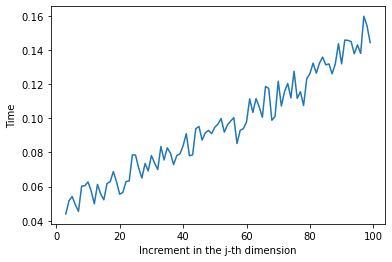

In [19]:
plt.plot(label,time_cont)
plt.xlabel('Increment in the j-th dimension')
plt.ylabel('Time')

As we can see, the time required changes subtetly from one increase in the temporal frequency to another.  
However, there is a **clear positive trend** which indicates that the larger the number of variables, the more times it takes to find the optimal solution.

### g) Changing parameters

The parameter that will be changed is one that is critical in the evolution of the simulation we have designed: the number of **initial infected people**.  
As this number grows large, the budget available will not be enough to sustain the monthly and trimestral growth.  
Therefore, we should expect to not find an optimal solution for large numbers.

As for the smaller numbers, the cost needed will be much less, so the value of the objective function should increase as the initial number of infected people grows.

In [20]:
m = 3
c = {}
supps = [supp1,supp2,supp3,supp4]
for j in range(3):
    for i in range(9):
        for k in range(4):
            c[((4*i)+(k+1),j+1)] = supps[k][j][0][i]
def hosp_opt():
    model = pyo.ConcreteModel(name="Hospital scheduling")

    model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
    model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)

    model.I = pyo.RangeSet(1,model.n) 
    model.J = pyo.RangeSet(1,model.m)

    model.c = pyo.Param(model.I, model.J,initialize=c)
    model.exp = pyo.Param(model.J,initialize=exp)
    model.exp1 = pyo.Param(model.J,initialize=exp1)
    model.exp2 = pyo.Param(model.J,initialize=exp2)
    model.exp3 = pyo.Param(model.J,initialize=exp3)
    model.bud = pyo.Param(model.J,initialize=bud)

    model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeIntegers)

    def obj_expression(model): 
        return pyo.summation(model.c, model.x)  

    model.OBJ = pyo.Objective(rule=obj_expression)

    def beds1_constraint(model, j): 
         return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
    def beds2_constraint(model, j): 
         return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
    def beds3_constraint(model, j): 
         return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]

    def respirators3_constraint(model, j): 
         return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
    def respirators2_constraint(model, j): 
         return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]

    def epidemic_exp_constraint(model, j): 
         return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
    def meals_constraint(model, j): 
         return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
    def laundry_constraint(model, j): 
         return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
    def fungibles_constraint(model, j): 
         return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

    def budget_constraint(model, j): 
         return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
    def total_budget_constraint(model): 
         return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud


    model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
    model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
    model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
    model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
    model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
    model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
    model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
    model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
    model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
    model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
    model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)

    M = 10**6
    model.Y = pyo.RangeSet(1,1)

    model.y1 = pyo.Var(model.Y, domain=pyo.Binary)
    def cond1_1(model):
        return -model.exp[2] - M*model.y1[1] <= -8*0.5*exp[1]
    def cond1_2(model):
        return sum(model.c[i,2]*model.x[i,2] for i in model.I) - M*(1-model.y1[1]) <= bud[2] - 10**4

    def cond2(model):
        return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y1[1]) <= total_bud - 3*10**5

    model.y3 = pyo.Var(model.Y, domain=pyo.Binary)
    def cond3_1(model):
        return -model.exp[3] - M*model.y3[1] <= -(12/8)*0.25*exp[2]
    def cond3_2(model):
        return sum(model.c[i,2]*model.x[i,2] for i in model.I) - M*(1-model.y3[1]) <= bud[2] - 10**4

    def cond4(model):
        return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) - M*(1-model.y3[1]) <= total_bud - 3*10**5

    model.dem_Constraint12 = pyo.Constraint(rule=cond1_1)
    model.dem_Constraint13 = pyo.Constraint(rule=cond1_2)
    model.dem_Constraint14 = pyo.Constraint(rule=cond2)
    model.dem_Constraint15 = pyo.Constraint(rule=cond3_1)
    model.dem_Constraint16 = pyo.Constraint(rule=cond3_2)
    model.dem_Constraint17 = pyo.Constraint(rule=cond4)

    results = opt.solve(model,tee=True)
    return results['Problem'][0]['Lower bound']

In [21]:
values = []
label = []
for cont in range(1,20):
    print(cont)
    initial = cont*10
    monthly_gr = 0.5
    monthly_gr3 = 0.25

    exp = {1:initial,
           2:8*initial*monthly_gr,
           3:4*3*initial*monthly_gr*monthly_gr3}
    bud = {1:2*10**6,2:5*10**6,3:10**6}
    total_bud = 10*10**6

    exp1 = {x:math.ceil(y*0.6) for x, y in exp.items()}
    exp2 = {x:math.ceil(y*0.3) for x, y in exp.items()}
    exp3 = {x:math.ceil(y*0.1) for x, y in exp.items()}
    of_value = hosp_opt()
    if of_value == -np.inf:
        of_value = 0
    values.append(of_value)
    label.append(10*cont)

1
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpkrt1sm36.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpc4c1o7tf.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpihpl1gub.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpihpl1gub.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpihpl1gub.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpihpl1gub.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpc4c1o7tf.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
110 integer variables, 2 of which are binary
Scaling..

5
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpn0fk3fth.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpp4ni_frn.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp29h9vile.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp29h9vile.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmp29h9vile.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmp29h9vile.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpp4ni_frn.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
110 integer variables, 2 of which are binary
Scaling..

9
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp6muhg_qr.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpagx18n_0.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpjxfa7n9z.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpjxfa7n9z.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpjxfa7n9z.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpjxfa7n9z.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpagx18n_0.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
110 integer variables, 2 of which are binary
Scaling..

13
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmp_1ue4qqz.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmpojv53r2r.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmpo_cxlhst.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmpo_cxlhst.pyomo.lp'...
C:\Users\mzaba\AppData\Local\Temp\tmpo_cxlhst.pyomo.lp:1069: warning: lower bound of variable 'x109' redefined
C:\Users\mzaba\AppData\Local\Temp\tmpo_cxlhst.pyomo.lp:1069: warning: upper bound of variable 'x109' redefined
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
1071 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmpojv53r2r.glpk.glp'...
1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
110 integer variables, 2 of which are binary
Scaling.

1026 lines were written
GLPK Integer Optimizer 5.0
38 rows, 111 columns, 619 non-zeros
110 integer variables, 2 of which are binary
Preprocessing...
35 rows, 110 columns, 616 non-zeros
110 integer variables, 2 of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+06  ratio =  1.000e+06
GM: min|aij| =  8.825e-01  max|aij| =  1.133e+00  ratio =  1.284e+00
EQ: min|aij| =  7.996e-01  max|aij| =  1.000e+00  ratio =  1.251e+00
2N: min|aij| =  5.000e-01  max|aij| =  1.705e+00  ratio =  3.409e+00
Constructing initial basis...
Size of triangular part is 35
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
35 rows, 110 columns, 616 non-zeros
      0: obj =   0.000000000e+00 inf =   4.612e+05 (27)
     40: obj =   8.000000000e+06 inf =   2.210e+04 (3)
LP HAS NO PRIMAL FEASIBLE SOLUTION
Time used:   0.0 secs
Memory used: 0.2 Mb (185540 bytes)
Writing MIP solution to 'C:\Users\mzaba\AppData\Local\Temp\tmp0nu41q1o.glpk.raw'...
158 lines were written
18
GLPSOL--GLPK LP/MIP So

Text(0, 0.5, 'Objective function (millions of euros)')

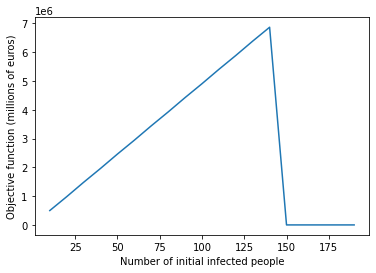

In [22]:
import matplotlib.pyplot as plt
plt.plot(label,values)
plt.xlabel('Number of initial infected people')
plt.ylabel('Objective function (millions of euros)')

In [23]:
print('Values of objective function: ', values)

Values of objective function:  [499083.333333333, 981000.0, 1480083.33333333, 1962000.0, 2461083.33333333, 2943000.0, 3442083.33333333, 3924000.0, 4423083.33333333, 4905000.0, 5404083.33333333, 5886000.0, 6385083.33333333, 6867000.0, 0, 0, 0, 0, 0]


We see a very clear linear trend as the number of initial patients has also grown linearly, so it makes sense that the objective function would also grow linearly.  
As for the last values, as we observed previously, when the number of initial infected people is too large, it is not possible to provide enough resources.  
Hence, the problem becomes unsolvable.

### Appendix: Interactive implementation of data

In [24]:
def interactive_opt():
    cond = True
    while cond == True:
        initial = int(input('Number of weekly initial patients:'))
        monthly_gr = float(input('Rate of monthly growth:'))
        monthly_gr3 = float(input('Rate of trimestral growth:'))
        bud1 = int(input('Weekly budget (in millions):'))
        bud2 = int(input('Monthly budget (in millions):'))
        bud3 = int(input('Trimestral budget (in millions):'))
        total_bud = int(input('Total budget (in millions):'))*10**6
        rate1 = float(input('Rate of regular patients:'))
        rate2 = float(input('Rate of intermediate patients:'))
        rate3 = float(input('Rate of critical patients:'))

        exp = {1:initial,
               2:8*initial*monthly_gr,
               3:4*3*initial*monthly_gr*monthly_gr3}
        bud = {1:bud1*10**6,2:bud2*10**6,3:bud3*10**6}

        exp1 = {x:math.ceil(y*rate1) for x, y in exp.items()}
        exp2 = {x:math.ceil(y*rate2) for x, y in exp.items()}
        exp3 = {x:math.ceil(y*rate3) for x, y in exp.items()}
        c = {}
        supps = [supp1,supp2,supp3,supp4]
        for j in range(3):
            for i in range(9):
                for k in range(4):
                    c[((4*i)+(k+1),j+1)] = supps[k][j][0][i]
        n = 36
        m = 3
        model = pyo.ConcreteModel(name="Hospital scheduling")
        model.n = pyo.Param(within=pyo.NonNegativeIntegers,initialize=n)
        model.m = pyo.Param(within=pyo.NonNegativeIntegers,initialize=m)
        model.I = pyo.RangeSet(1,model.n) 
        model.J = pyo.RangeSet(1,model.m)
        model.c = pyo.Param(model.I, model.J,initialize=c)
        model.exp = pyo.Param(model.J,initialize=exp)
        model.exp1 = pyo.Param(model.J,initialize=exp1)
        model.exp2 = pyo.Param(model.J,initialize=exp2)
        model.exp3 = pyo.Param(model.J,initialize=exp3)
        model.bud = pyo.Param(model.J,initialize=bud)
        model.x = pyo.Var(model.I,model.J, domain=pyo.NonNegativeReals)

        def obj_expression(model): 
            return pyo.summation(model.c, model.x)  

        model.OBJ = pyo.Objective(rule=obj_expression)

        def beds1_constraint(model, j): 
             return sum(model.x[i,j] for i in range(1,5)) >= model.exp1[j]
        def beds2_constraint(model, j): 
             return sum(model.x[i,j] for i in range(5,9)) >= model.exp2[j]
        def beds3_constraint(model, j): 
             return sum(model.x[i,j] for i in range(9,13)) >= model.exp3[j]

        def respirators3_constraint(model, j): 
             return sum(model.x[i,j] for i in range(13,17)) >= model.exp3[j]
        def respirators2_constraint(model, j): 
             return sum(model.x[i,j] for i in range(17,21)) >= model.exp2[j]

        def epidemic_exp_constraint(model, j): 
             return sum(model.x[i,j] for i in range(21,25)) >= (30*3)*model.exp[j]
        def meals_constraint(model, j): 
             return sum(model.x[i,j] for i in range(25,29)) >= 30*model.exp[j]
        def laundry_constraint(model, j): 
             return sum(model.x[i,j] for i in range(29,33)) >= 30*model.exp[j]
        def fungibles_constraint(model, j): 
             return sum(model.x[i,j] for i in range(33,37)) >= 30*model.exp[j]

        def budget_constraint(model, j): 
             return sum(model.c[i,j]*model.x[i,j] for i in model.I) <= bud[j]
        def total_budget_constraint(model): 
             return sum(sum(model.c[i,j]*model.x[i,j] for i in model.I) for j in model.J) <= total_bud

        model.dem_Constraint1 = pyo.Constraint(model.J, rule=beds1_constraint)
        model.dem_Constraint2 = pyo.Constraint(model.J, rule=beds2_constraint)
        model.dem_Constraint3 = pyo.Constraint(model.J, rule=beds3_constraint)
        model.dem_Constraint4 = pyo.Constraint(model.J, rule=respirators3_constraint)
        model.dem_Constraint5 = pyo.Constraint(model.J, rule=respirators2_constraint)
        model.dem_Constraint6 = pyo.Constraint(model.J, rule=epidemic_exp_constraint)
        model.dem_Constraint7 = pyo.Constraint(model.J, rule=meals_constraint)
        model.dem_Constraint8 = pyo.Constraint(model.J, rule=laundry_constraint)
        model.dem_Constraint9 = pyo.Constraint(model.J, rule=fungibles_constraint)
        model.dem_Constraint10 = pyo.Constraint(model.J, rule=budget_constraint)
        model.dem_Constraint11 = pyo.Constraint(rule=total_budget_constraint)

        results = opt.solve(model,tee=True)

        if results['Problem'][0]['Lower bound'] == -np.inf:
            print('There is no solution, try inputing new data!')
        else:
            print(model.display())
            cond = False

In [25]:
interactive_opt() # try a couple of configurations to see it indeed works!

Number of weekly initial patients:100
Rate of monthly growth:0.8
Rate of trimestral growth:0.2
Weekly budget (in millions):2000
Monthly budget (in millions):1000
Trimestral budget (in millions):5000
Total budget (in millions):213000
Rate of regular patients:0.5
Rate of intermediate patients:0.2
Rate of critical patients:0.3
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\mzaba\AppData\Local\Temp\tmpzwv6kji_.glpk.raw --wglp C:\Users\mzaba\AppData\Local\Temp\tmprlsc1qeb.glpk.glp
 --cpxlp C:\Users\mzaba\AppData\Local\Temp\tmp0odzk_up.pyomo.lp
Reading problem data from 'C:\Users\mzaba\AppData\Local\Temp\tmp0odzk_up.pyomo.lp'...
32 rows, 109 columns, 325 non-zeros
645 lines were read
Writing problem data to 'C:\Users\mzaba\AppData\Local\Temp\tmprlsc1qeb.glpk.glp'...
609 lines were written
GLPK Simplex Optimizer 5.0
32 rows, 109 columns, 325 non-zeros
Preprocessing...
31 rows, 108 columns, 324 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|ai